## Affine transforms

##### Reading an Image

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = plt.imread('Images/bird.jpeg')

# Get image dimensions
height, width, channels = image.shape

In [13]:
def affine_transform(matrix):
    transformed_image_array = np.zeros((height, width, channels), dtype=image.dtype)

    inverse_matrix = np.linalg.inv(matrix)

    # Apply the matrix to each pixel of the input image
    for y in range(height):
        for x in range(width):
            # Apply shear matrix to the pixel coordinates
            transformed_coordinates = np.dot(inverse_matrix, [x, y, 1])
            input_x, input_y = transformed_coordinates[:2].astype(int)
            
            # Check if the transformed coordinates are within the bounds of the input image
            if 0 <= input_x < width and 0 <= input_y < height:
                transformed_image_array[y, x] = image[input_y, input_x]  # Fixed the indexing here
    return transformed_image_array

### 1. Identity

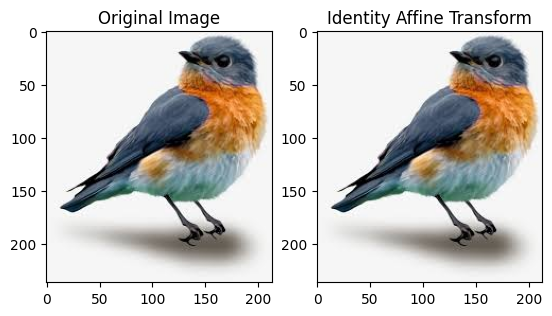

In [14]:
# Create an identity matrix
identity_matrix = np.array([[1, 0, 0],
                             [0, 1, 0],
                             [0, 0, 1]])

identity_image = affine_transform(identity_matrix)

# Display images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('Identity Affine Transform')
plt.imshow(identity_image)
plt.show()


### 2. Scaling

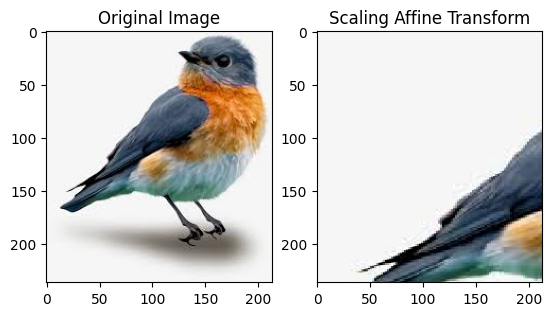

In [15]:
# Define scaling factors
scale_x = 2.0  # Scale factor along the x-axis
scale_y = 1.5  # Scale factor along the y-axis

# Create the scaling matrix
scaling_matrix = np.array([[scale_x, 0, 0], 
                            [0, scale_y, 0],
                            [0, 0, 1]])


transformed_image = affine_transform(scaling_matrix)
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(transformed_image)
plt.title('Scaling Affine Transform')
plt.show()

### 3. Rotation

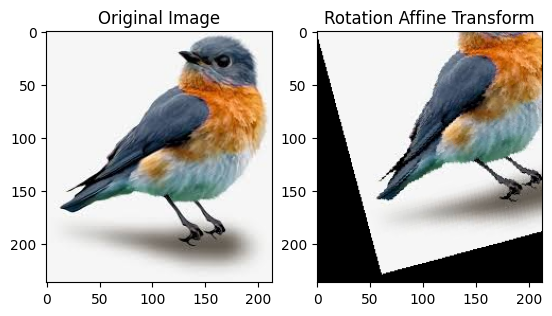

In [16]:
# Define the rotation angle in radians
angle = np.radians(15)  # 15 degrees rotation

# Define the rotation matrix
rotation_matrix = np.array([[np.cos(angle), np.sin(angle), 0],
                            [-np.sin(angle), np.cos(angle), 0],
                            [0, 0, 1]])


rotated_image = affine_transform(rotation_matrix)
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title('Rotation Affine Transform')
plt.show()


### 4. Translation

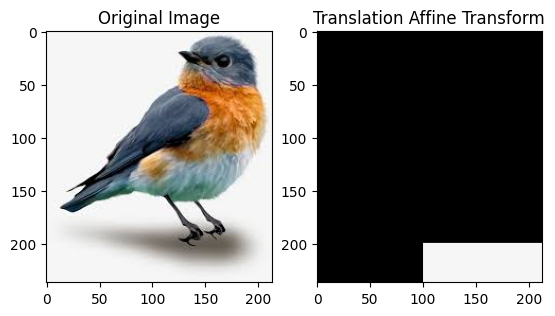

In [17]:
# Define the translation vector
tx = 100  # Translation along the x-axis
ty = 200  # Translation along the y-axis

# Define the translation matrix
translation_matrix = np.array([[1, 0, tx],
                               [0, 1, ty],
                               [0, 0, 1]])

translated_image = affine_transform(translation_matrix)
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title('Translation Affine Transform')
plt.show()


### 5. Shear (Vertical)

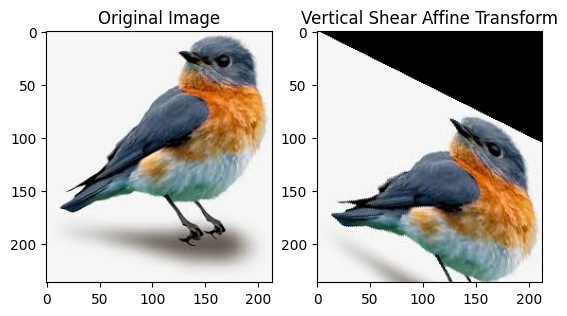

In [18]:
# Define the shear factor (vertical shear)
shear_factor = 0.5  # Adjust as needed

# Define the shear matrix
shear_matrix = np.array([[1, 0, 0],
                          [shear_factor, 1, 0],
                          [0, 0, 1]])

ver_sheared_image = affine_transform(shear_matrix)

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(ver_sheared_image)
plt.title('Vertical Shear Affine Transform')
plt.show()


### 6. Shear (Horizontal)

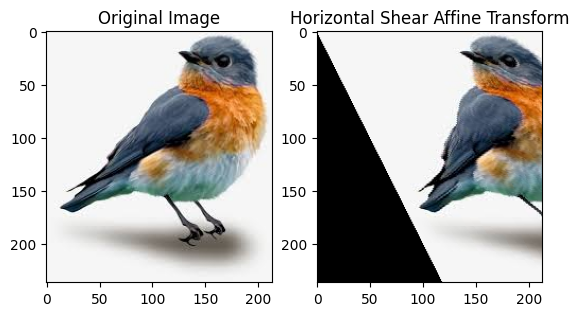

In [19]:
# Define the shear factor (vertical shear)
shear_factor = 0.5  # Adjust as needed

# Define the shear matrix
shear_matrix = np.array([[1, shear_factor, 0],
                          [0, 1, 0],
                          [0, 0, 1]])

hor_sheared_image = affine_transform(shear_matrix)

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(hor_sheared_image)
plt.title('Horizontal Shear Affine Transform')
plt.show()


### 7. Reflection

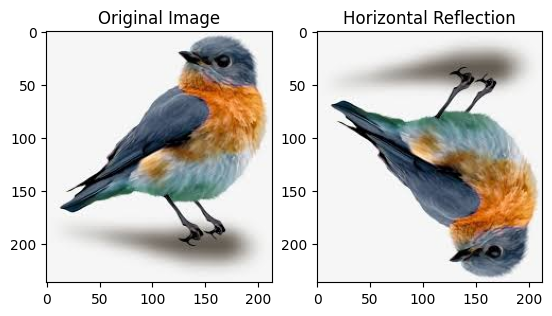

In [20]:

# Create the reflection matrix for horizontal reflection
reflection_matrix_horizontal = np.array([[1, 0, 0],  
                                       [0, -1, height-1], # Adjusted for negative coordinates
                                       [0, 0, 1]])

# Apply affine transform using inverse mapping
reflected_image_horizontal = affine_transform(reflection_matrix_horizontal)

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(reflected_image_horizontal)
plt.title('Horizontal Reflection')
plt.show()


### Draw rectangle around image

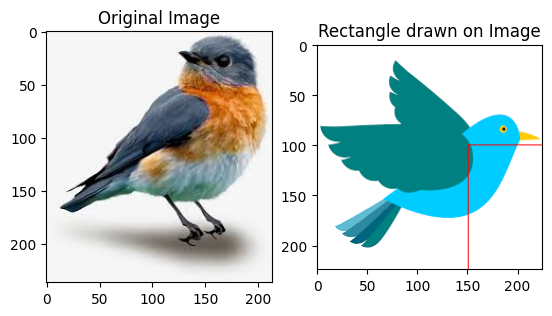

In [21]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

# Load the image
img = Image.open('Images/bird_2.png')
draw = ImageDraw.Draw(img)

# Draw a rectangle on the image
draw.rectangle((150, 100, 400, 400), outline=(255, 0, 0))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1,2,2)
plt.title('Rectangle drawn on Image')
# Display the image
plt.imshow(img)
plt.show()


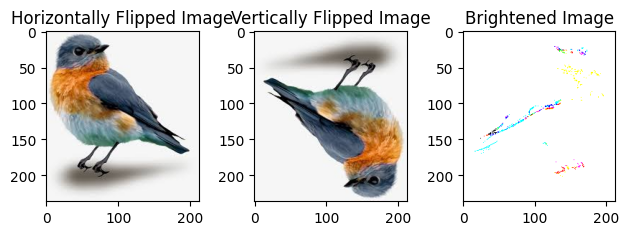

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = 'Images/bird.jpeg'
image = plt.imread(image_path)


# 1. Flipping: Flip the image horizontally
flipped_horizontal_image = np.fliplr(image)

# Display the horizontally flipped image
plt.subplot(234)
plt.imshow(flipped_horizontal_image)
plt.title('Horizontally Flipped Image')

# 2. Flipping: Flip the image vertically
flipped_vertical_image = np.flipud(image)

# Display the vertically flipped image
plt.subplot(235)
plt.imshow(flipped_vertical_image)
plt.title('Vertically Flipped Image')

# 3. Adjusting brightness/contrast: Increase brightness
brightness_factor = 1.5
brightened_image = np.clip(image * brightness_factor, 0, 1)

# Display the brightened image
plt.subplot(236)
plt.imshow(brightened_image)
plt.title('Brightened Image')

plt.tight_layout()
plt.show()



1. Affine Transforms:<br>
    Affine transforms preserve parallel lines, ratios of distances along lines, and angles between lines.<br> 
    In other words, they preserve straight lines and the relative proportions of shapes.<br>
    Affine transformations include translation, rotation, scaling, and shearing.<br>
    An affine transformation can be represented by a 2x3 matrix, where the last row is fixed as [0, 0, 1].<br>
    Examples of affine transformations include resizing an image, rotating an object, and translating an object.<br>
        <br>
2. Projective Transforms (Homographies):<br>
    Projective transforms, also known as homographies or perspective transforms, can represent more general <br>
    transformations that include perspective distortions.<br>
    Projective transformations do not necessarily preserve parallel lines, ratios of distances along lines, or angles between lines.<br>
    A projective transformation can be represented by a 3x3 matrix, allowing for more degrees of freedom compared to affine transformations.<br>
    Projective transformations are used to correct perspective distortion in images, such as rectifying images of planar surfaces, or <br>
    for more general perspective transformations in computer graphics.<br>
    Unlike affine transformations, projective transformations can transform a quadrilateral into any other quadrilateral.<br>